In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [2]:
df = pd.read_csv("ReportFpgNewInfections.csv")

In [3]:
df.head()

,SporozoiteToHuman_Time,SporozoiteToHuman_NodeID,SporozoiteToHuman_VectorID,SporozoiteToHuman_BiteID,SporozoiteToHuman_HumanID,SporozoiteToHuman_NewInfectionID,SporozoiteToHuman_NewGenomeID,HomeNodeID,FemaleGametocyteToVector_Time,FemaleGametocyteToVector_NodeID,...,FemaleGametocyteToVector_HumanID,FemaleGametocyteToVector_InfectionID,FemaleGametocyteToVector_GenomeID,MaleGametocyteToVector_Time,MaleGametocyteToVector_NodeID,MaleGametocyteToVector_VectorID,MaleGametocyteToVector_BiteID,MaleGametocyteToVector_HumanID,MaleGametocyteToVector_InfectionID,MaleGametocyteToVector_GenomeID
0,144,340461476,87041,259801,995,21,10,0,126,340461476,...,391,5,10,126,340461476,87041,214221,391,5,10
1,146,340461476,89151,264739,269,22,4,0,128,340461476,...,234,2,4,128,340461476,89151,219021,234,2,4
2,146,340461476,89043,265052,307,23,2,0,128,340461476,...,151,1,2,128,340461476,89043,219322,151,1,2
3,147,340461476,87041,267498,59,24,10,0,126,340461476,...,391,5,10,126,340461476,87041,214221,391,5,10
4,147,340461476,83540,268831,638,25,2,0,129,340461476,...,151,1,2,129,340461476,83540,223200,151,1,2


In [4]:
df.columns

Index(['SporozoiteToHuman_Time', 'SporozoiteToHuman_NodeID',
       'SporozoiteToHuman_VectorID', 'SporozoiteToHuman_BiteID',
       'SporozoiteToHuman_HumanID', 'SporozoiteToHuman_NewInfectionID',
       'SporozoiteToHuman_NewGenomeID', 'HomeNodeID',
       'FemaleGametocyteToVector_Time', 'FemaleGametocyteToVector_NodeID',
       'FemaleGametocyteToVector_VectorID', 'FemaleGametocyteToVector_BiteID',
       'FemaleGametocyteToVector_HumanID',
       'FemaleGametocyteToVector_InfectionID',
       'FemaleGametocyteToVector_GenomeID', 'MaleGametocyteToVector_Time',
       'MaleGametocyteToVector_NodeID', 'MaleGametocyteToVector_VectorID',
       'MaleGametocyteToVector_BiteID', 'MaleGametocyteToVector_HumanID',
       'MaleGametocyteToVector_InfectionID',
       'MaleGametocyteToVector_GenomeID'],
      dtype='object')

In [5]:
# How often are female and male gametocytes drawn at different times?
two_times = df['FemaleGametocyteToVector_Time'] != df['MaleGametocyteToVector_Time']
print(np.sum(two_times))

0


In [6]:
two_times = df['FemaleGametocyteToVector_BiteID'] != df['MaleGametocyteToVector_BiteID']
print(np.sum(two_times))

0


Text(0.5, 0, 'Time difference (days)')

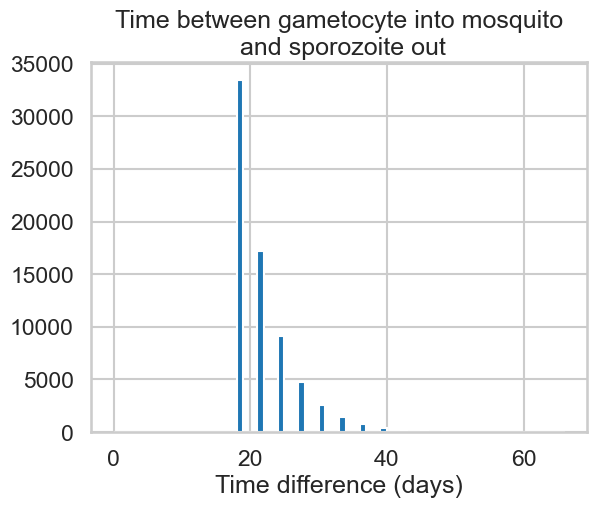

In [15]:
t_delay = df['SporozoiteToHuman_Time'] - df['FemaleGametocyteToVector_Time']
plt.hist(t_delay, bins=np.arange(np.max(t_delay)+1))
plt.title('Time between gametocyte into mosquito\n and sporozoite out')
plt.xlabel('Time difference (days)')

count
1    31439
2    11386
3     3832
4      892
5      164
6       36
7        3
Name: count, dtype: int64


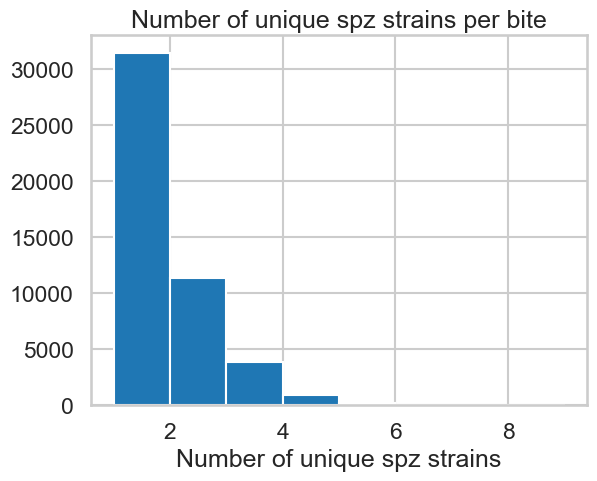

In [21]:
# Number of unique spz strains per bite
plt.hist(df['SporozoiteToHuman_BiteID'].value_counts().values, bins=np.arange(1, 10))
plt.title('Number of unique spz strains per bite')
plt.xlabel('Number of unique spz strains')
print(df['SporozoiteToHuman_BiteID'].value_counts().value_counts())

([<matplotlib.axis.XTick at 0x220ed2e22e0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

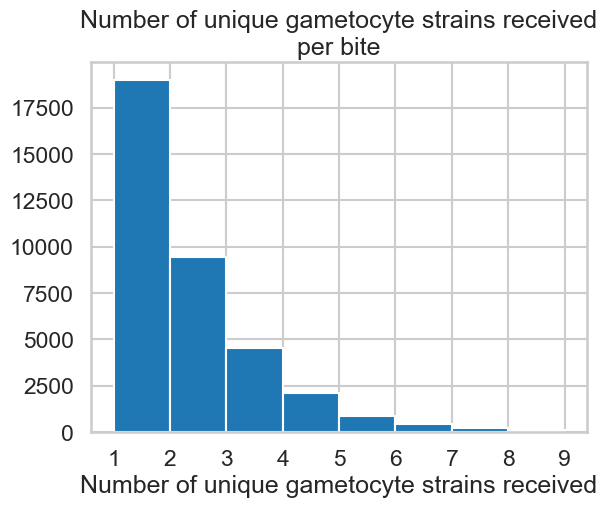

In [26]:
# Number of unique gametocyte strains per bite
plt.hist(df['FemaleGametocyteToVector_BiteID'].value_counts().values, bins=np.arange(1, 10))
plt.title('Number of unique gametocyte strains received\nper bite')
plt.xlabel('Number of unique gametocyte strains received')
plt.xticks(np.arange(1, 10))